In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import pandas as pd

In [30]:
# let us create our own dataset

x_data = np.linspace(0.0,10.0,100000)

In [31]:
# lets add some noise for our regression purpose

noise = np.random.randn(len(x_data))

In [32]:
noise.shape

(100000,)

y = mx + b + noise
This is our linear model we want to predict

b = 5
m = 0.5

In [33]:
y_true = (0.5 * x_data + 5 + noise)

In [34]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [35]:
x_df.head()

,X Data
0,0.0000
1,0.0001
2,0.0002
3,0.0003
4,0.0004


In [36]:
my_data = pd.concat([x_df,y_df],axis=1)

In [37]:
my_data.head()

,X Data,Y
0,0.0000,5.145347
1,0.0001,5.595971
2,0.0002,5.149557
3,0.0003,5.375174
4,0.0004,5.793586


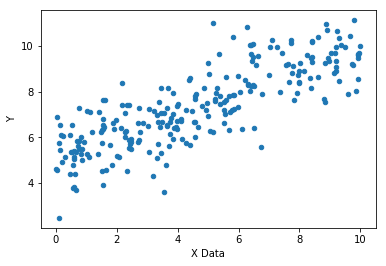

In [38]:
my_data.sample(n=250).plot(kind = 'scatter', x='X Data', y = 'Y')

### since we have million of datapoints we cannot pass million of data point at once. Rather we can create batches for training the weights

In [39]:
batch_size = 8

In [40]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [41]:
# Now let us define the placeholder to feed the x and y value during the training
# by passing [batch_size],  we are fixing the amount of data that would feed into the network, but note it is optional without
xph = tf.placeholder(tf.float32,[batch_size])

In [42]:
yph = tf.placeholder(tf.float32,[batch_size])

In [43]:
y_model = m * xph + b

In [44]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [45]:
# Define the optimizer and then use it to mimimize the error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [46]:
init = tf.global_variables_initializer()

In [47]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    # it takes the index of 8 size batch as defined earlier and also it run it for 1000 times to update the weights
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        # Prepare about what you want to feed to the model
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    
    # let's grab the value of converged m and b
    model_m, model_b = sess.run([m,b])

In [48]:
rand_ind

array([37433, 94217, 45253, 43099, 70653, 89365,  4322, 98077])

In [49]:
model_m

0.48521495

In [50]:
model_b

4.9204664

In [51]:
# This line is to predict the y_parameter.
y_hat = x_data*model_m + model_b

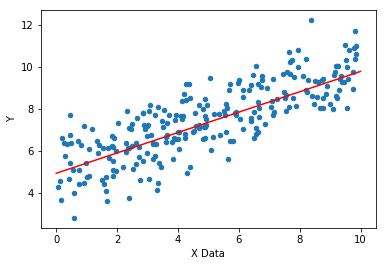

In [52]:
my_data.sample(250).plot(kind = 'scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')